### Clustering

In [60]:
import numpy as np
import numpy.linalg as lg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random, os, math
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as keras
from numpy.linalg import norm

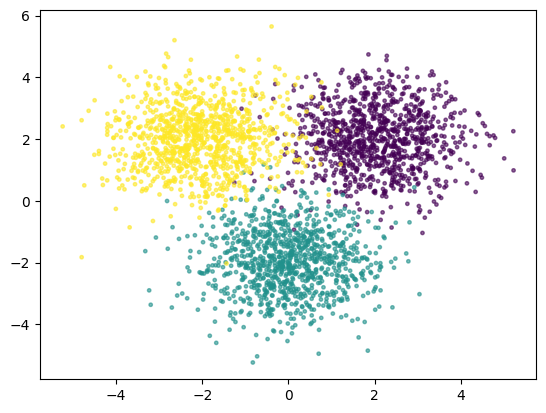

In [61]:
D = 2
K = 3
N = int(K*1e3)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, s=6, alpha=0.6)

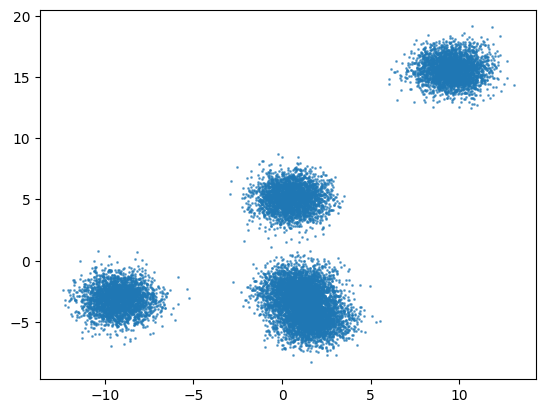

In [62]:
N = 3001
D = 2
X=[]
means=[]
k = 5

for i in range(k):
  X.append(np.random.randn(N,D)+np.random.randn(1,D)*8.4)
  means.append(np.mean(X[-1], axis=0))

X=np.vstack(X)
means =np.vstack(means)

plt.figure()
plt.scatter(X[:,0],X[:,1],s=1,alpha=0.6)

In [63]:
def Distance(X, means,*args,**kwargs):
  diff=[]
  dists=[]
  for mean in means:
    diff=X-mean
    dist=np.sqrt(np.sum(diff**2,axis=1, keepdims=True))
    dists.append(dist)
  return np.hstack(dists)

In [64]:
def Responsibility(X,means,beta=1e-3,*args,**kwargs):
  diff=[]
  responsibilities=[]

  for mean in means:
    diff =X -mean
    dist =(np.sum(diff ** 2,axis=1,keepdims=True))

    numerator= np.exp(-(beta*dist))
    denominator=np.sum(numerator)
    responsibility=-numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

In [65]:
class K_Means:
  def __init__(self, k=3, distance_func=Distance, beta=None):
    self.k=k
    self.distance_func=distance_func
    self.beta=beta

  def fit(self, X, iterations = 5):
    indices =np.arange(X.shape[0])
    sample_indices = np.random.choice(indices, size=self.k, replace=False)
    self.means =X[sample_indices]

    for i in range(iterations):
      y_hat = self.predict(X)
      self.means=[]
      for j in range(self.k):
        mean =np.mean(X[y_hat==j], axis=0)
        self.means.append(mean)
      self.means =np.vstack(self.means)
      
    y_hat = self.predict(X)
    plt.figure()
    plt.scatter(X[:,0],X[:,1], s=1, c=y_hat)
    plt.scatter(self.means[:,0],self.means[:,1], c='k', s=9)
    plt.show()
    return y_hat

  def predict(self, X):
    dist = self.distance_func(X, self.means, self.beta)
    y_hat = np.argmin(dist, axis=1)
    return y_hat

 

In [ ]:
kmeans_dist = K_Means(k=5,distance_func=Responsibility)

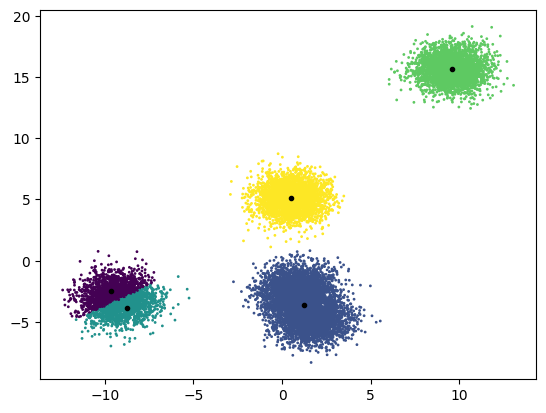

In [69]:
y_hat = kmeans_dist.fit(X,8)

### TODO

Do Elbow method to find the Optimum K